<a href="https://colab.research.google.com/github/haroldpc258/Audio-Spectrogram-Analysis-and-Object-Detection-using-KeyPoints-Comparison/blob/master/ProyectoDSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Comparación y procesamiento de audio**

Carga inicial de librerias y archivos de audio

In [ ]:
!pip install opencv-contrib-python==3.4.11.45
import numpy as np
import cv2
import scipy as sp
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
import scipy.fftpack
from IPython.display import Audio
from scipy.signal import freqz
from scipy.signal import butter, lfilter
from google.colab.patches import cv2_imshow

print("Librerías cargadas...")




Librerías cargadas...


Carga audio de referencia

In [ ]:
# audioRef = input('Ingrese la ubicación del audio referencia:' )
audioRef = '/content/drive/MyDrive/Proyecto DSP/esp1.wav'
muestreoRef, sonidoRef = waves.read(audioRef)
print("Audio cargado...")
Audio(sonidoRef,rate=muestreoRef)


Audio cargado...


Carga audio comparación

In [ ]:
# audioComp = input('Ingrese la ubicación del audio a comparar:' )
audioComp = '/content/drive/MyDrive/Proyecto DSP/esp1.wav'
muestreoComp, sonidoComp = waves.read(audioComp)
print("Audio cargado...")
Audio(sonidoComp,rate=muestreoComp)


Audio cargado...


Representación audio referencia

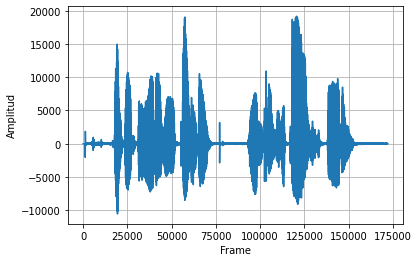

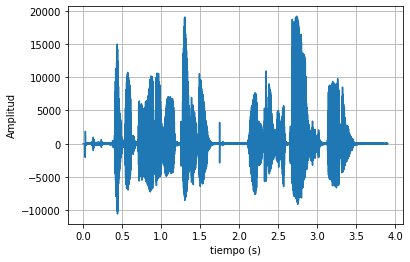

In [ ]:
# canales: monofónico o estéreo
tamanoRef = np.shape(sonidoRef)
muestrasRef = tamanoRef[0]
cRef = len(tamanoRef)
canalesRef = 1  # monofónico
if (cRef>1):  # estéreo
    canalesRef = tamanoRef[1]    #canales

# canal a representar
if (canalesRef>1):
    canalRef = 0
    uncanalRef = sonidoRef[:,canal]
else:
    uncanalRef = sonidoRef

sonidoRef = uncanalRef

# Gráfica
plt.figure("Gráfica con respecto al Frame")
plt.plot(sonidoRef)
plt.grid()
plt.xlabel('Frame')
plt.ylabel('Amplitud')

plt.figure("Gráfica con respecto al Tiempo")
tRef = np.linspace(0, muestrasRef/muestreoRef, muestrasRef)
plt.plot(tRef,sonidoRef)
plt.grid()
plt.xlabel('tiempo (s)')
plt.ylabel('Amplitud')

plt.show()



Representación audio comparación

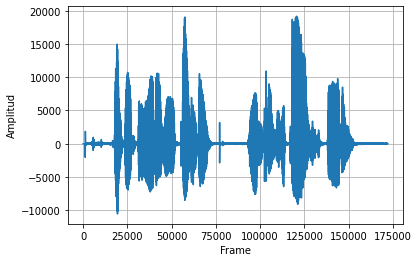

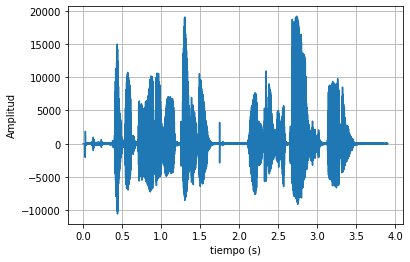

In [ ]:
# canales: monofónico o estéreo
tamanoComp = np.shape(sonidoComp)
muestrasComp = tamanoComp[0]
cComp = len(tamanoComp)
canalesComp = 1  # monofónico
if (cComp>1):  # estéreo
    canalesComp = tamanoComp[1]  #numero canales

# canal a representar
if (canalesComp>1):
    canalComp = 0
    uncanalComp = sonidoComp[:,canal]
else:
    uncanalComp = sonidoComp

sonidocomp = uncanalComp
#waves.write('audioRef.wav', muestreoRef, uncanalRef)

# Gráfica
plt.figure("Gráfica con respecto al Frame")
plt.plot(sonidoComp)
plt.grid()
plt.xlabel('Frame')
plt.ylabel('Amplitud')

plt.figure("Gráfica con respecto al Tiempo")
tComp = np.linspace(0, muestrasComp/muestreoComp, muestrasComp)
plt.plot(tComp,sonidoComp)
plt.grid()
plt.xlabel('tiempo (s)')
plt.ylabel('Amplitud')

plt.show()

Filtro pasabanda

In [ ]:
def butter_bandpass(lowcut, highcut, Fs, order = 5):
  nyq = Fs / 2.
  low = lowcut / nyq
  high = highcut / nyq
  b, a = butter(order, [low, high], btype='bandpass')
  return b, a
def butter_bandpass_filter(data, lowcut, highcut, Fs, order = 5):
  b, a = butter_bandpass(lowcut, highcut, Fs, order=order)
  y = lfilter(b, a, data)
  w, h = freqz(b, a, worN=2000)
  plt.figure()
  plt.plot((Fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)
  plt.xlabel('Frequency (Hz)'),plt.ylabel('Gain'),plt.grid(),plt.legend(loc='best')
  plt.figure()
  angles = np.unwrap(np.angle(h))
  plt.plot((Fs * 0.5 / np.pi) * w, angles, 'g')
  plt.ylabel('Angle (radians)', color='g')
  plt.xlabel('Frequency (Hz)')
  plt.grid()
  plt.axis('tight')
  return y

Filtrado y espectro audio referencia


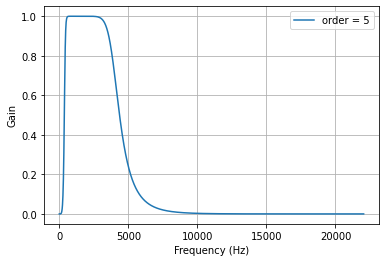

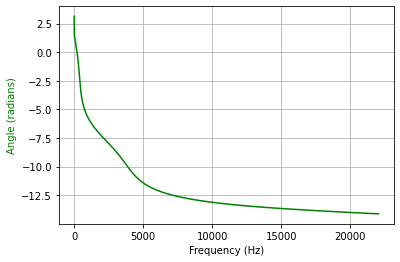

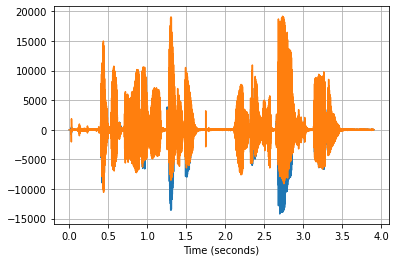

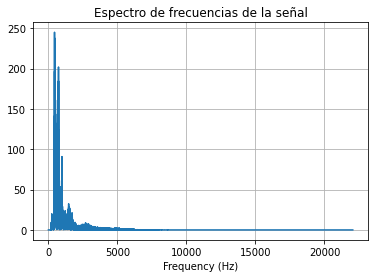

In [ ]:
lowcut = 400
highcut = 4000
Fs = muestreoRef
sig = sonidoRef

sig_Ref = butter_bandpass_filter(sig, lowcut, highcut, Fs, order=5)
plt.figure()
plt.plot(tRef, sig_Ref), plt.xlabel('Time (seconds)'), plt.grid()
plt.plot(tRef,sonidoRef)
#plt.xlim([0,1])
plt.show()

# Cálculo del espectro de la señal
yf_Ref = scipy.fftpack.fft(sig_Ref)                    # Transformada de Fourier de la señal
Espec = 2.0 / len(tRef) * np.abs( yf_Ref [ 0:int(len(tRef)/2) ] )   # Espectro de la señal
Freq = np.linspace(0.0,  Fs/2 , int(len(tRef)/2) )      #Vector de frecuencias del espectro
plt.figure()
plt.plot(Freq, Espec), plt.grid(), plt.xlabel("Frequency (Hz)"), plt.title("Espectro de frecuencias de la señal")
plt.show()

Audio(sig_Ref,rate=muestreoRef)


Filtrado y espectro audio comparación

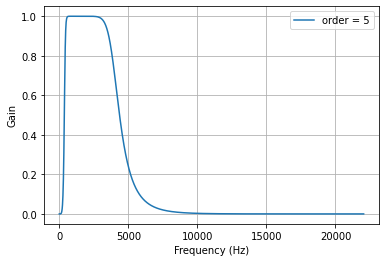

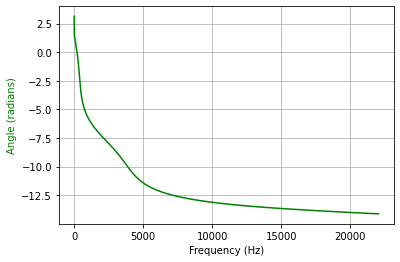

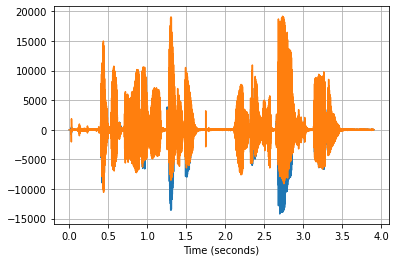

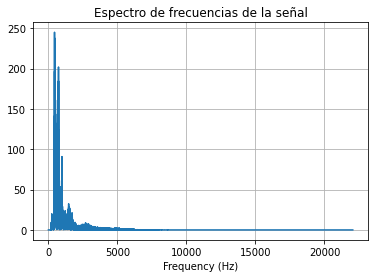

In [ ]:
lowcut = 400
highcut = 4000
Fs = muestreoComp
sig = sonidoComp

sig_Comp = butter_bandpass_filter(sig, lowcut, highcut, Fs, order=5)
plt.figure()
plt.plot(tComp, sig_Comp), plt.xlabel('Time (seconds)'), plt.grid()
plt.plot(tComp,sonidoComp)
#plt.xlim([0,1])
plt.show()

# Cálculo del espectro de la señal
yf_Comp = scipy.fftpack.fft(sig_Comp)                    # Transformada de Fourier de la señal
Espec = 2.0 / len(tComp) * np.abs( yf_Comp [ 0:int(len(tComp)/2) ] )   # Espectro de la señal
Freq = np.linspace(0.0,  Fs/2 , int(len(tComp)/2) )      #Vector de frecuencias del espectro
plt.figure()
plt.plot(Freq, Espec), plt.grid(), plt.xlabel("Frequency (Hz)"), plt.title("Espectro de frecuencias de la señal")
plt.show()

Audio(sig_Comp,rate=muestreoRef)

Espectrograma audio referencia

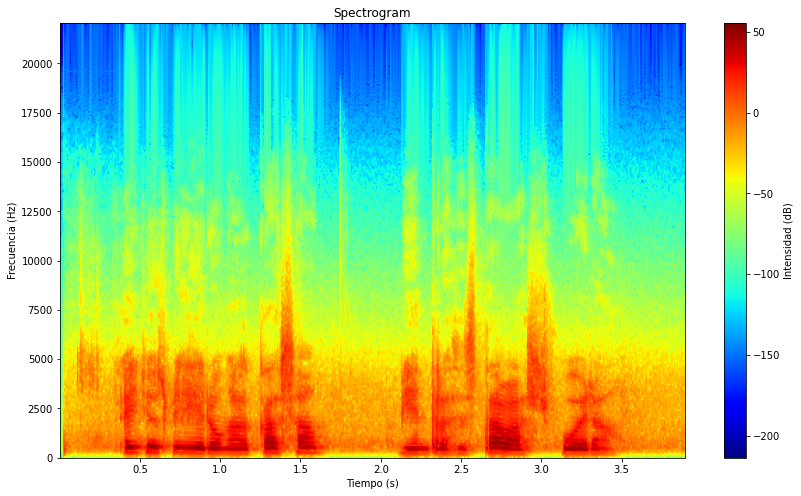

In [ ]:
def plot_specgram(data, title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    pxxRef,  freqRef, tRef, specRef = plt.specgram(sig_Ref, NFFT=512, Fs=muestreoRef, cmap="jet")
    fig.colorbar(specRef).set_label('Intensidad (dB)')

plot_specgram(sig_Ref,title='Spectrogram', x_label='Tiempo (s)', y_label='Frecuencia (Hz)', fig_size=(14,8))

#cv2.imwrite('sig_Ref.png', sig_Ref)

Guadar espectrograma audio Referencia

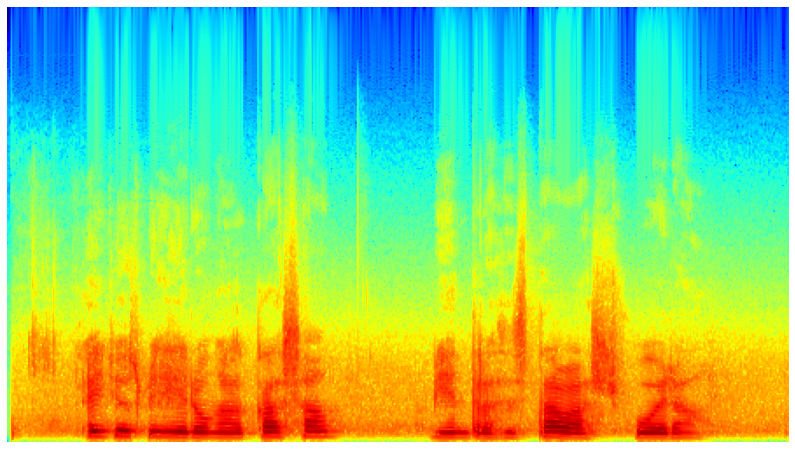

In [ ]:
def plot_specgram(data, title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    pxxRef,  freqRef, tRef, specRef = plt.specgram(sig_Ref, NFFT=512, Fs=muestreoRef, cmap="jet")

plot_specgram(sig_Ref,fig_size=(14,8))
plt.axis('off')
plt.savefig("sig_Ref")

Espectrograma comparación

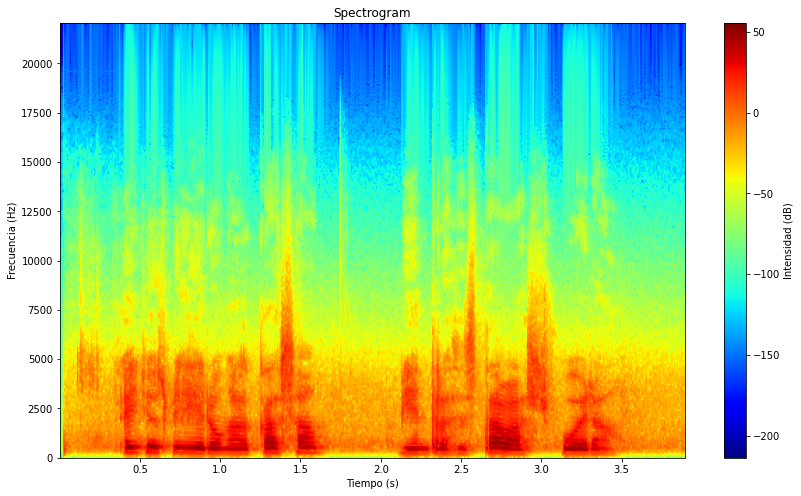

In [ ]:
def plot_specgram(data, title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    pxxComp,  freqComp, tComp, specComp = plt.specgram(sig_Comp, NFFT=512, Fs=muestreoComp, cmap="jet")
    fig.colorbar(specComp).set_label('Intensidad (dB)')

plot_specgram(sig_Comp,title='Spectrogram', x_label='Tiempo (s)', y_label='Frecuencia (Hz)', fig_size=(14,8))

Guardar espectrograma audio comparación

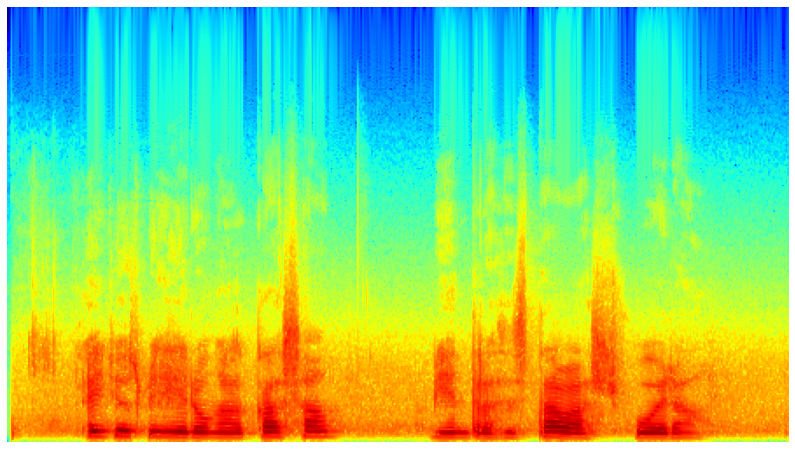

In [ ]:
def plot_specgram(data, title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    pxxComp,  freqComp, tComp, specComp = plt.specgram(sig_Comp, NFFT=512, Fs=muestreoRef, cmap="jet")

plot_specgram(sig_Ref,fig_size=(14,8))
plt.axis('off')
plt.savefig("sig_Comp")

Detección de manchas audio referecia

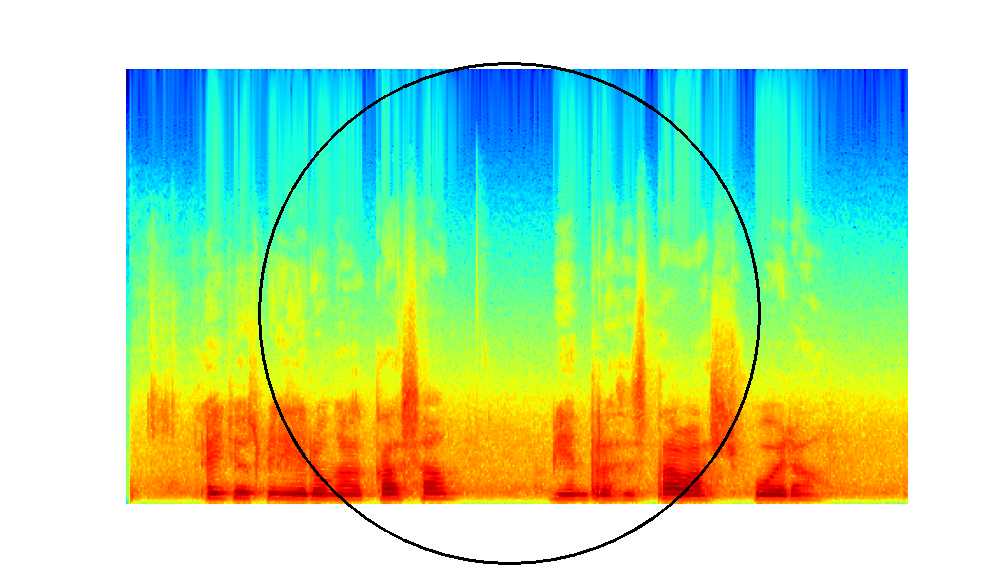

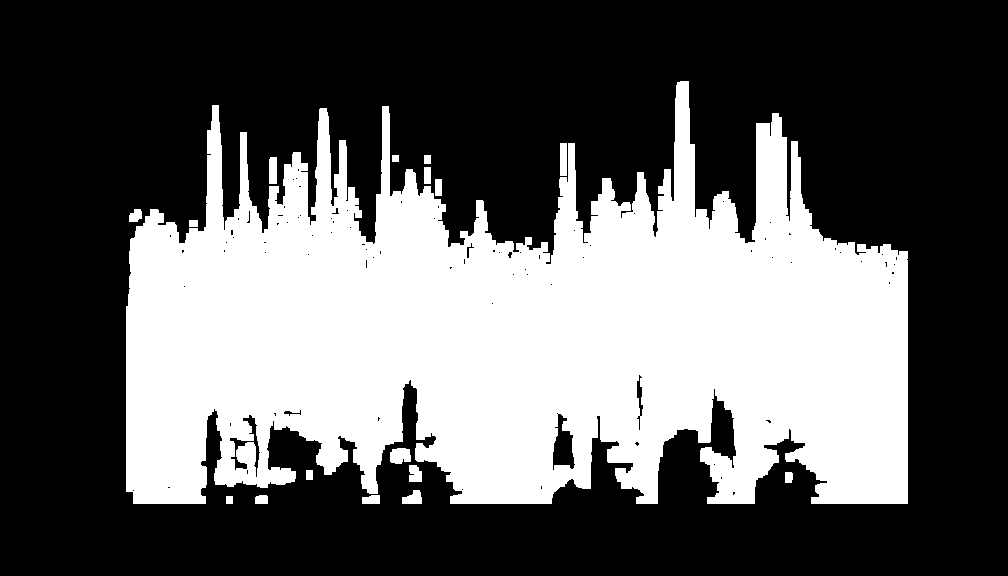

In [ ]:
# Font to write text overlay
font = cv2.FONT_HERSHEY_SIMPLEX

# Create lists that holds the thresholds
hsvMin = (10,0,0)
hsvMax = (85,255,255)


# Read test image
frameRef = cv2.imread("sig_Ref.png")

# Convert to HSV
hsv = cv2.cvtColor(frameRef, cv2.COLOR_BGR2HSV)

# Apply HSV thresholds
maskBlobRef = cv2.inRange(hsv, hsvMin, hsvMax)

# Erode and dilate
maskBlobRef = cv2.erode(maskBlobRef, None, iterations=3)
maskBlobRef = cv2.dilate(maskBlobRef, None, iterations=3)

# Adjust detection parameters
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 100;

# Filter by Area.
params.filterByArea = True
params.minArea = 400
params.maxArea = 999999999999999999

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.5

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.5

# Detect blobs
detector = cv2.SimpleBlobDetector_create(params)

# Invert the mask
reversemask = 255-maskBlobRef

# Run blob detection
keypointsRef = detector.detect(reversemask)

# Get the number of blobs found
blobCount = len(keypointsRef)

# Write the number of blobs found
#text = "Count=" + str(blobCount)
#cv2.putText(frameRef, text, (5,25), font, 1, (0, 255, 0), 2)

if blobCount > 0:
    # Write X position of first blob
    blob_x = keypointsRef[0].pt[0]
    #text2 = "X=" + "{:.2f}".format(blob_x )
    #cv2.putText(frameRef, text2, (5,50), font, 1, (0, 255, 0), 2)

    # Write Y position of first blob
    blob_y = keypointsRef[0].pt[1]
    #text3 = "Y=" + "{:.2f}".format(blob_y)
    #cv2.putText(frameRef, text3, (5,75), font, 1, (0, 255, 0), 2)

    # Write Size of first blob
    blob_size = keypointsRef[0].size
    #text4 = "S=" + "{:.2f}".format(blob_size)
    #cv2.putText(frameRef, text4, (5,100), font, 1, (0, 255, 0), 2)

    # Draw circle to indicate the blob
    cv2.circle(frameRef, (int(blob_x),int(blob_y)), int(blob_size / 2), (0, 0, 0), 2)

# Show image
cv2_imshow(frameRef)
cv2_imshow(maskBlobRef)
cv2.waitKey(0)
cv2.destroyAllWindows()

Detección de objetos audio Referencia

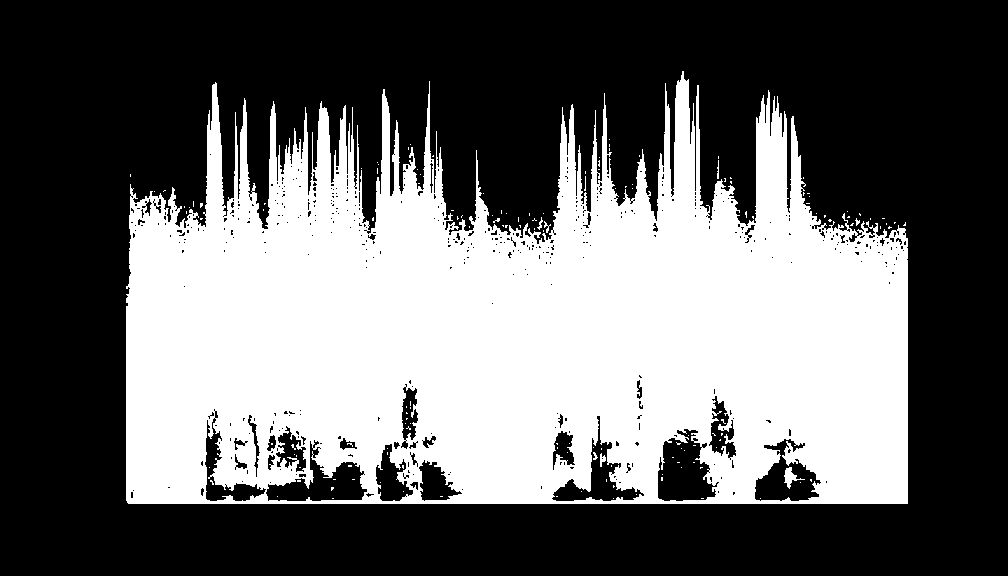

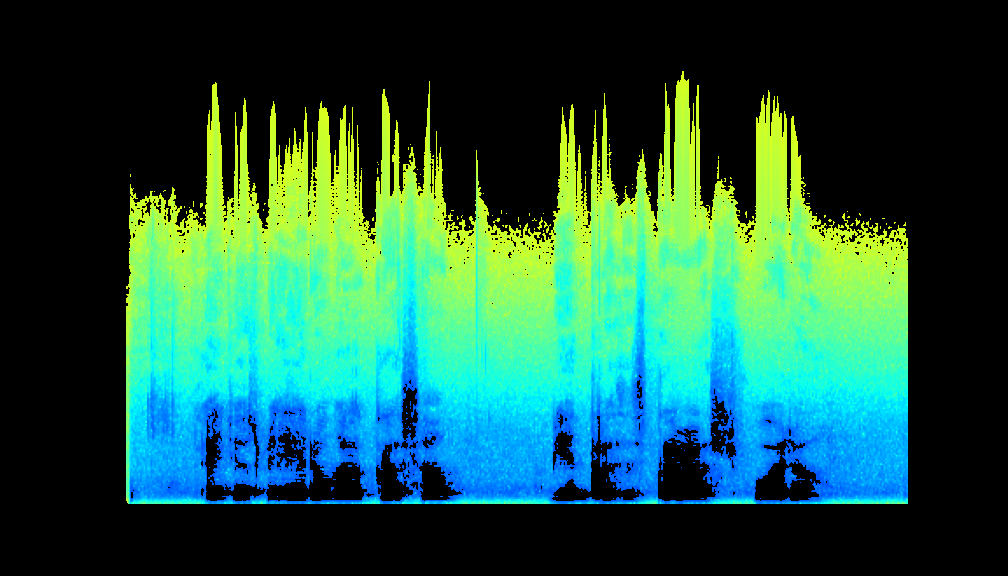

In [ ]:
img = cv2.imread("sig_Ref.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Elegimos el umbral de verde en HSV
umbral_bajo = (10,0,0)
umbral_alto = (85,255,255)
# hacemos la mask y filtramos en la original
maskRef = cv2.inRange(img_hsv, umbral_bajo, umbral_alto)
resRef = cv2.bitwise_and(img, img, mask=maskRef)

cv2_imshow(maskRef)
cv2_imshow(resRef)
cv2.waitKey(0)
cv2.destroyAllWindows()

Detección de manchas audio comparación

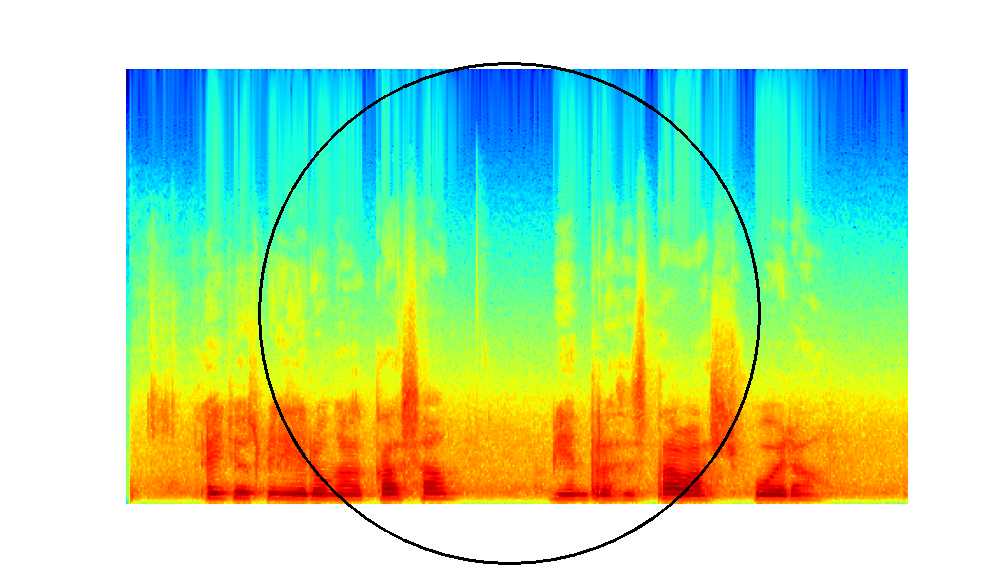

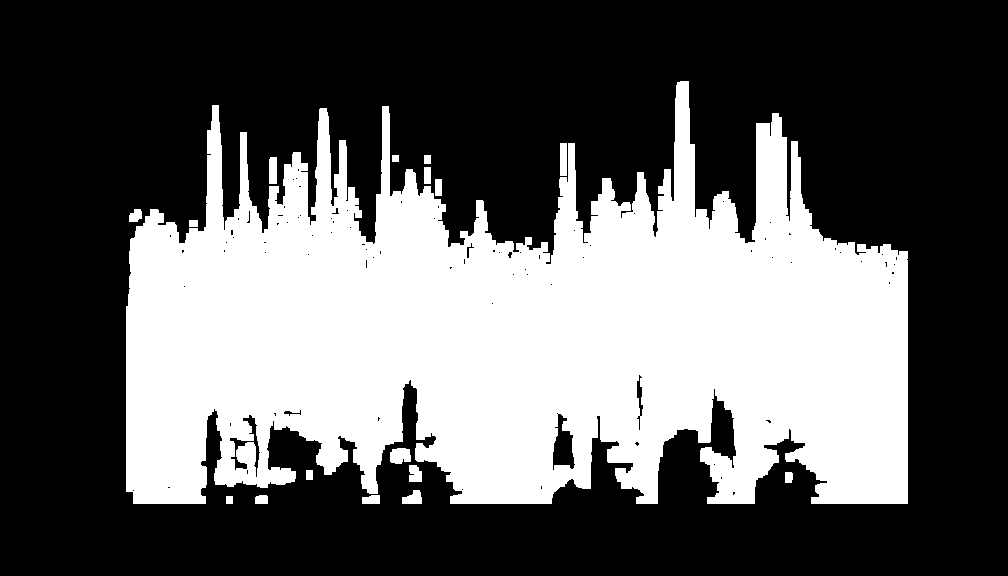

In [ ]:
# Font to write text overlay
font = cv2.FONT_HERSHEY_SIMPLEX

# Create lists that holds the thresholds
hsvMin = (10,0,0)
hsvMax = (85,255,255)


# Read test image
frameComp = cv2.imread("sig_Comp.png")

# Convert to HSV
hsv = cv2.cvtColor(frameComp, cv2.COLOR_BGR2HSV)

# Apply HSV thresholds
maskBlobComp = cv2.inRange(hsv, hsvMin, hsvMax)

# Erode and dilate
maskBlobComp = cv2.erode(maskBlobComp, None, iterations=3)
maskBlobComp = cv2.dilate(maskBlobComp, None, iterations=3)

# Adjust detection parameters
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0;
params.maxThreshold = 100;

# Filter by Area.
params.filterByArea = True
params.minArea = 400
params.maxArea = 999999999999999999

# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.5

# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.5

# Detect blobs
detectorComp = cv2.SimpleBlobDetector_create(params)

# Invert the mask
reversemask = 255-maskBlobComp

# Run blob detection
keypointsComp = detector.detect(reversemask)

# Get the number of blobs found
blobCount = len(keypointsComp)

# Write the number of blobs found
#text = "Count=" + str(blobCount)
#cv2.putText(frameComp, text, (5,25), font, 1, (0, 255, 0), 2)

if blobCount > 0:
    # Write X position of first blob
    blob_x = keypointsComp[0].pt[0]
    #text2 = "X=" + "{:.2f}".format(blob_x )
    #cv2.putText(frameComp, text2, (5,50), font, 1, (0, 255, 0), 2)

    # Write Y position of first blob
    blob_y = keypointsComp[0].pt[1]
    #text3 = "Y=" + "{:.2f}".format(blob_y)
    #cv2.putText(frameComp, text3, (5,75), font, 1, (0, 255, 0), 2)

    # Write Size of first blob
    blob_size = keypointsComp[0].size
    #text4 = "S=" + "{:.2f}".format(blob_size)
    #cv2.putText(frameComp, text4, (5,100), font, 1, (0, 255, 0), 2)

    # Draw circle to indicate the blob
    cv2.circle(frameComp, (int(blob_x),int(blob_y)), int(blob_size / 2), (0, 0, 0), 2)

# Show image
cv2_imshow(frameComp)
cv2_imshow(maskBlobComp)

cv2.waitKey(0)
cv2.destroyAllWindows()

Detección de objetos audio comparación

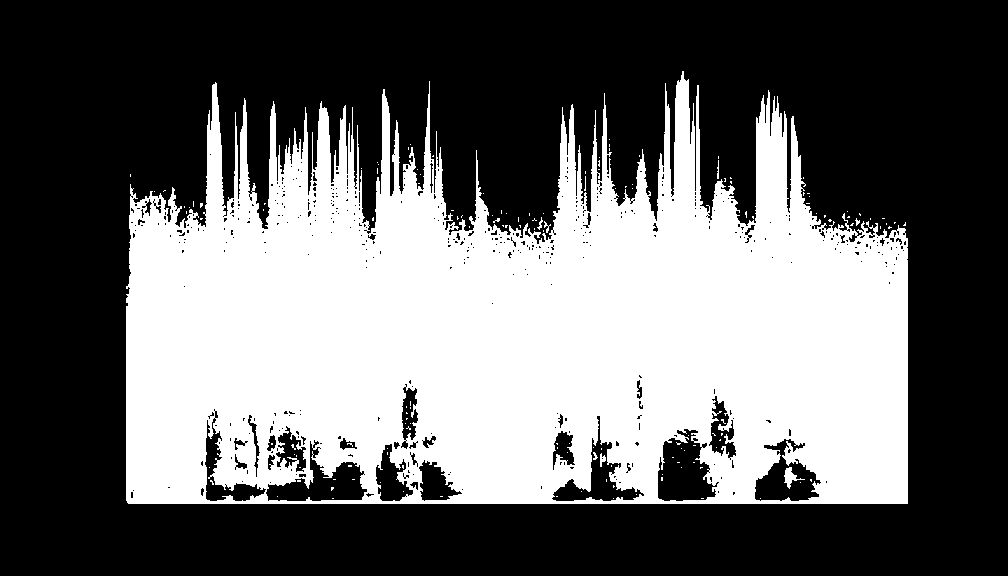

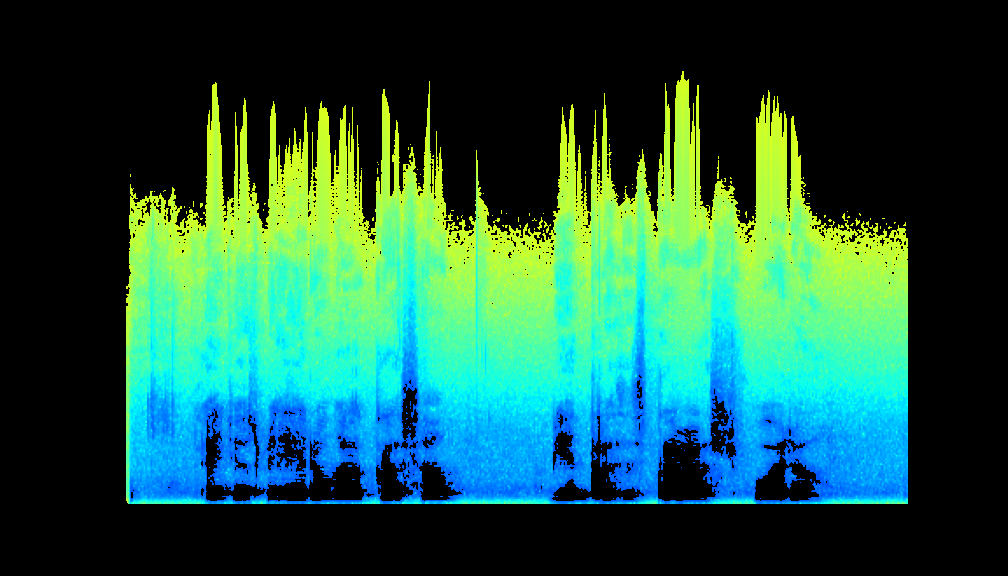

In [ ]:
img = cv2.imread("sig_Comp.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# Elegimos el umbral en HSV
umbral_bajo = (10,0,0)
umbral_alto = (85,255,255)
# hacemos la mask y filtramos en la original
maskComp = cv2.inRange(img_hsv, umbral_bajo, umbral_alto)
resComp = cv2.bitwise_and(img, img, mask=maskComp)

cv2_imshow(maskComp)
cv2_imshow(resComp)
cv2.waitKey(0)
cv2.destroyAllWindows()

Comparándolas

Keypoints 1st image 1388
Keypoints 2st image 1388
GOOD matches: 1386
El porcentaje de coincidencia de los audios fue de: 99.85590778097982 %


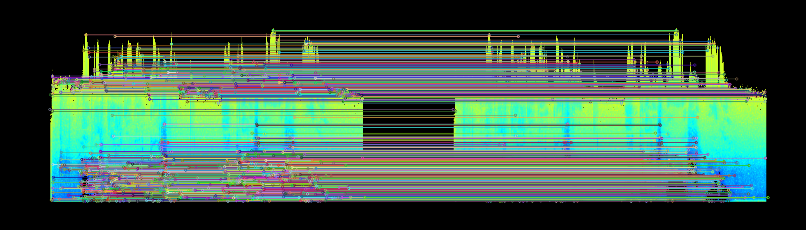

In [ ]:
original = resRef                   #cv2.imread("image.jpg")
image_to_compare = resComp        #cv2.imread("image_filter1.jpg")

# 1) Check if 2 images are equals
#if original.shape == image_to_compare.shape:
#    print('Las imagenes tienen el mismo tamaño y canal.')
#    difference = cv2.subtract(original, image_to_compare)
#    b, g, r = cv2.split(difference)
#    print(cv2.countNonZero(b))
#    if (cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0):
#        print('Las imagenes son completamente iguales.')
#    else:
#        print('Las imagenes no son iguales.')

# 2) Check la similitud de las dos imagenes
shift = cv2.xfeatures2d.SIFT_create()
kp_1, desc_1 = shift.detectAndCompute(original, None)
kp_2, desc_2 = shift.detectAndCompute(image_to_compare, None)

print("Keypoints 1st image", str(len(kp_1)))
print("Keypoints 2st image", str(len(kp_2)))

index_params = dict(algorithm=0, trees=5)
search_params = dict()

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(desc_1, desc_2, k=2)

good_points = []
for m, n in matches:
    if m.distance < 0.925*n.distance:
        good_points.append(m)

number_keypoints = 0
if (len(kp_1) <= len(kp_2)):
    number_keypoints = len(kp_1)
else:
    number_keypoints = len(kp_2)

print("GOOD matches:",len(good_points))
print("El porcentaje de coincidencia de los audios fue de:", len(good_points) / number_keypoints * 100, "%")

result = cv2.drawMatches(original, kp_1, image_to_compare, kp_2, good_points, None)
cv2_imshow(cv2.resize(result, None, fx = 0.4, fy=0.4))
cv2.imwrite("Feature_matching.jpg", result)

cv2.waitKey(0)
cv2.destroyAllWindows()